# Notes

## Loading the Code

Comet_ML library and experiment must be run before mlflow and sklearn. They cannot be run in the same cell if you are using jupyter notebook 

## Limitations of Comet

Note: 
Comet does not support 
* Does not support MLFlow nested runs. (this is not 'with)
* Does not support continuing a previous MLFlow run. The MLFlow extension will create a new Comet Experiment in that case.


### Does not Support a Previous MLflow Run
Ml flow usually contains multiple experiments in a run. However Comet's experiment tracking tool creates an experiment for each time the code is run. This can get very confusing, and should be noted or tagged for each experiments or in a notes. 

### Does not Support MLflow nested runs. 
This means that you cannot use the with statement to run the MLflow code. It must be outside of the with statement. Mlflow runs that are enhanced using Comet need to be denested.

# Support Needed from Comet
* Example of a Nested Run. What is this? 

# Code

In [1]:
import os
import warnings
import sys

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# Import comet_ml at the top of your file - these must be imported before sklearn or mlflow
from comet_ml import Experiment
import comet_ml

In [2]:

import mlflow
import mlflow.sklearn

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import ElasticNet


In [3]:
'''# Create an experiment with your api key
experiment = Experiment(
    api_key="xCeYnrykwJF1pzF0Rfj8UEzR2",
    project_name="comet_mlflow", 
    workspace="mattblasa",
    log_code = True
)
# THIS IS NOT NEEDED IF you are using ML FLOW. '''

'# Create an experiment with your api key\nexperiment = Experiment(\n    api_key="xCeYnrykwJF1pzF0Rfj8UEzR2",\n    project_name="comet_mlflow", \n    workspace="mattblasa",\n    log_code = True\n)\n# THIS IS NOT NEEDED IF you are using ML FLOW. '

In [4]:
def eval_metrics(actual, pred):
    rmse = np.sqrt(mean_squared_error(actual, pred))
    mae = mean_absolute_error(actual, pred)
    r2 = r2_score(actual, pred)
    return rmse, mae, r2


In [5]:
warnings.filterwarnings("ignore")
np.random.seed(40)

# Read the wine-quality csv file (make sure you're running this from the root of MLflow!)

data = pd.read_csv('wine-quality.csv')

In [9]:
mlflow.start_run()

COMET WARNING: As you are running in a Jupyter environment, you will need to call `experiment.end()` when finished to ensure all metrics and code are logged before exiting.
COMET INFO: Experiment is live on comet.ml https://www.comet.ml/mattblasa/general/bf08ddd5685349c788a773b5a8b52fe3



<ActiveRun: >

In [6]:
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


In [7]:
# Split the data into training and test sets. (0.75, 0.25) split.
train, test = train_test_split(data)

In [8]:


# The predicted column is "quality" which is a scalar from [3, 9]
train_x = train.drop(["quality"], axis=1)
test_x = test.drop(["quality"], axis=1)
train_y = train[["quality"]]
test_y = test[["quality"]]

#alpha = float(sys.argv[1]) if len(sys.argv) > 1 else 0.5
#l1_ratio = float(sys.argv[2]) if len(sys.argv) > 2 else 0.5

alpha = 0 
l1_ratio = 0

'''with mlflow.start_run():
    lr = ElasticNet(alpha=alpha, l1_ratio=l1_ratio, random_state=42)
    lr.fit(train_x, train_y)

    predicted_qualities = lr.predict(test_x)

    (rmse, mae, r2) = eval_metrics(test_y, predicted_qualities)

    print("Elasticnet model (alpha=%f, l1_ratio=%f):" % (alpha, l1_ratio))
    print("  RMSE: %s" % rmse)
    print("  MAE: %s" % mae)
    print("  R2: %s" % r2)

    mlflow.log_param("alpha", alpha)
    mlflow.log_param("l1_ratio", l1_ratio)
    mlflow.log_metric("rmse", rmse)
    mlflow.log_metric("r2", r2)
    mlflow.log_metric("mae", mae)

    mlflow.sklearn.log_model(lr, "model")
    print("Model saved in run %s" % mlflow.active_run().info.run_uuid)'''

'with mlflow.start_run():\n    lr = ElasticNet(alpha=alpha, l1_ratio=l1_ratio, random_state=42)\n    lr.fit(train_x, train_y)\n\n    predicted_qualities = lr.predict(test_x)\n\n    (rmse, mae, r2) = eval_metrics(test_y, predicted_qualities)\n\n    print("Elasticnet model (alpha=%f, l1_ratio=%f):" % (alpha, l1_ratio))\n    print("  RMSE: %s" % rmse)\n    print("  MAE: %s" % mae)\n    print("  R2: %s" % r2)\n\n    mlflow.log_param("alpha", alpha)\n    mlflow.log_param("l1_ratio", l1_ratio)\n    mlflow.log_metric("rmse", rmse)\n    mlflow.log_metric("r2", r2)\n    mlflow.log_metric("mae", mae)\n\n    mlflow.sklearn.log_model(lr, "model")\n    print("Model saved in run %s" % mlflow.active_run().info.run_uuid)'

### Run Notes: 
First Run is not logging the metrics. 
Second Run is logging the metrics. 

# Model Building

## Saving Figures

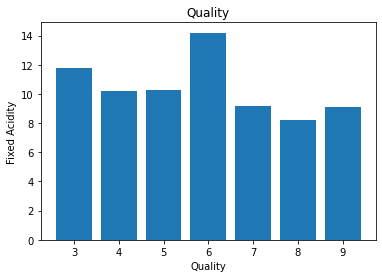

In [10]:
#logs the figure to Comet image store and saves it to comet artifact
plt.bar(data['quality'], data['fixed acidity'])
plt.xlabel('Quality')
plt.ylabel('Fixed Acidity')
plt.title('Quality')
plt.savefig("quality.png")
plt.show()
mlflow.log_artifact("quality.png")

In [11]:
lr = ElasticNet(alpha=alpha, l1_ratio=l1_ratio, random_state=42)
lr.fit(train_x, train_y)


ElasticNet(alpha=0, l1_ratio=0, random_state=42)

In [12]:

predicted_qualities = lr.predict(test_x)

(rmse, mae, r2) = eval_metrics(test_y, predicted_qualities)

print("Elasticnet model (alpha=%f, l1_ratio=%f):" % (alpha, l1_ratio))
print("  RMSE: %s" % rmse)
print("  MAE: %s" % mae)
print("  R2: %s" % r2)

mlflow.log_param("alpha", alpha)
mlflow.log_param("l1_ratio", l1_ratio)
mlflow.log_metric("rmse", rmse)
mlflow.log_metric("r2", r2)
mlflow.log_metric("mae", mae)

mlflow.sklearn.log_model(lr, "model")
print("Model saved in run %s" % mlflow.active_run().info.run_uuid)

Elasticnet model (alpha=0.000000, l1_ratio=0.000000):
  RMSE: 0.7424162938559533
  MAE: 0.5775168907128393
  R2: 0.2881067715835024
Model saved in run 866ad6f067e246a185cf96a141ae6ae4


In [13]:
mlflow.end_run()

COMET INFO: ---------------------------
COMET INFO: Comet.ml Experiment Summary
COMET INFO: ---------------------------
COMET INFO:   Data:
COMET INFO:     display_summary_level : 1
COMET INFO:     url                   : https://www.comet.ml/mattblasa/general/bf08ddd5685349c788a773b5a8b52fe3
COMET INFO:   Metrics:
COMET INFO:     mae  : 0.5775168907128393
COMET INFO:     r2   : 0.2881067715835024
COMET INFO:     rmse : 0.7424162938559533
COMET INFO:   Others:
COMET INFO:     Created from : MLFlow auto-logger
COMET INFO:   Parameters:
COMET INFO:     alpha    : 0
COMET INFO:     l1_ratio : 0
COMET INFO:   Uploads:
COMET INFO:     asset                    : 5 (6.95 KB)
COMET INFO:     environment details      : 1
COMET INFO:     filename                 : 1
COMET INFO:     git metadata             : 1
COMET INFO:     git-patch (uncompressed) : 1 (27.19 KB)
COMET INFO:     installed packages       : 1
COMET INFO:     notebook                 : 1
COMET INFO:     source_code              :